In [1]:
using Distributions
using DataFrames
using CornerPlot

### Example 1 - Gaussian Mixture

In [2]:
# create samples
μ₁ = [0.0, 0.0, 0.0]
μ₂ = [1.0, 2.0, 0.0]
Σ₁ = [1.0 0.5 -0.1; 0.5 1.0 0.0; -0.1 0.0 1.0]
Σ₂ = [1.0 -0.5 0.0; -0.5 1.0 0.0; 0.0 0.0 1.0]

X1 = rand(MvNormal(Σ₁), 10000)
X2 = μ₂ .+ 0.5 * rand(MvNormal(Σ₂), 5000)

X = hcat(X1,X2)

# give each dimension a name
dimnames = ["ξᵣ", "β", "Q"]

# create the array of "true means" to pass corner
truemeans = [[μ₁[i], μ₂[i]] for i in 1:3]

3-element Array{Array{Float64,1},1}:
 [0.0, 1.0]
 [0.0, 2.0]
 [0.0, 0.0]

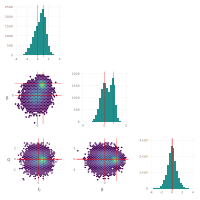

In [3]:
# transpose X so that each column represents one dimension
corner(X', varnames=dimnames, truthvals=truemeans)

### Example 2 - Rosenbrock Samples

In [4]:
# let's sample a banana using the Rosenbrock function
# here is the 2D version
function rosenbrock(x, args)
    a, b = args
    (a - x[1])^2 + b * (x[2] - x[1]^2)^2
end

# for the example, set a = 1 and b = 100
rosenbrock(x) = - rosenbrock(x, (1, 100))

rosenbrock (generic function with 2 methods)

In [5]:
# generate samples from this density using an MCMC sampler
using AffineInvariantMCMC

In [6]:
# make a simple starting guess for the samples
numdims = 2
numwalkers = 50
burnin = 10
numsamples_perwalker = 80
thinning = 5
x0 = -1.0 + 2 * rand(numdims, numwalkers)

# now run the sampler
chain, likevals = AffineInvariantMCMC.sample(rosenbrock, numwalkers, x0, burnin, 1)
chain, likevals = AffineInvariantMCMC.sample(rosenbrock, numwalkers, chain[:, :, end],
                                             numsamples_perwalker, thinning)

([-0.585112 -0.404132 … -0.710602 0.175167; 0.43259 -0.14106 … 0.408759 -0.080716]

[-0.649145 -0.257406 … -0.67268 0.0432983; 0.448704 -0.0457602 … 0.356885 -0.056295]

[-0.300453 -0.180593 … -0.673802 0.304154; 0.186579 -0.0667618 … 0.357484 0.145886]

...

[-0.0241166 0.538063 … 0.00738358 0.0658881; 0.0737653 0.140933 … 0.0389703 -0.0460819]

[0.21629 0.472274 … -0.240971 0.232636; 0.146385 0.121805 … -0.0327152 -0.0505317]

[0.0805117 0.472274 … -0.0545644 0.294637; 0.0177652 0.121805 … 0.060977 0.0712671], [-3.32679 -2.79428 … -1.60629 -0.85819; -11.2365 -2.83587 … -1.3034 -1.3034; … ; -3.85152 -3.71206 … -2.36415 -1.4485; -1.92133 -1.25365 … -1.68404 -0.521698])

In [7]:
# We can also make cornerplots with dataframes
df = DataFrame()

# flatten the chain and add to the dataframe
flatchain, flatlikevals = AffineInvariantMCMC.flattenmcmcarray(chain, likevals)
df[:x] = flatchain[1, :]
df[:y] = flatchain[2, :]

800-element Array{Float64,1}:
  0.43259  
 -0.14106  
  0.0197097
  0.924486 
  0.345663 
 -0.203402 
  0.265502 
 -0.0573038
 -0.0138518
  0.0262824
 -0.066713 
 -0.0309448
 -0.0339499
  ⋮        
  0.125666 
  0.587184 
 -0.0517088
  0.365948 
  1.28289  
  0.092653 
  0.210312 
  0.022121 
  0.0373242
  0.266815 
  0.060977 
  0.0712671

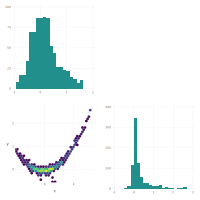

In [8]:
# and plot the samples with the cornerplot, specifying which columns we want
corner(df, varnames = [:x, :y])